In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from epam.sequences import translate_sequences

In [2]:
pcp_df = pd.read_csv("/Users/matsen/re/epam/_ignore/wyatt-10x-1p5m_pcp_2023-10-07.csv")

# drop first column (index)
pcp_df = pcp_df.drop(pcp_df.columns[0], axis=1)

pcp_df

,sample_id,family,parent,child,v_gene,child_is_leaf
0,0,149198,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,IGHV3-33*01,False
1,0,149198,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,IGHV3-33*01,False
2,0,149198,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAAGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,IGHV3-33*01,False
3,0,149198,CAAGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAAATGCAGATGGTGGAGTCGGGGGGAGGCGTGGTCCAGCCAGGGA...,IGHV3-33*01,True
4,0,149198,CAAGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAAGTGCAACTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,IGHV3-33*01,True
...,...,...,...,...,...,...
94624,0,17934,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,IGHV4-39*01,False
94625,0,17934,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTTGTGAAGCCTTCGG...,IGHV4-39*01,True
94626,0,17934,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,IGHV4-39*01,True
94627,0,269306,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,IGHV3-23*01,True


In [3]:
pcp_df["aa_parent"] = translate_sequences(pcp_df["parent"])
pcp_df["aa_child"] = translate_sequences(pcp_df["child"])

def mutation_vector_of(parent, child):
    return np.array(list(parent)) != np.array(list(child))

def mutation_column_of(col1, col2):
    return [mutation_vector_of(p, c) for p, c in zip(col1, col2)]

pcp_df["nt_mutations"] = mutation_column_of(pcp_df["parent"], pcp_df["child"])
pcp_df["aa_mutations"] = mutation_column_of(pcp_df["aa_parent"], pcp_df["aa_child"])

pcp_df["nt_mutation_count"] = [np.sum(x) for x in pcp_df["nt_mutations"]]
pcp_df["aa_mutation_count"] = [np.sum(x) for x in pcp_df["aa_mutations"]]

pcp_df

,sample_id,family,parent,child,v_gene,child_is_leaf,aa_parent,aa_child,nt_mutations,aa_mutations,nt_mutation_count,aa_mutation_count
0,0,149198,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,IGHV3-33*01,False,QVQLVESGGGVVQPGRSLRLSCAASGFTFSSSGMHWVRQAPGKGLE...,QVQLVESGGGVVQPGRSLRLSCAASGFTFNSSGMHWVRQAPGKGLE...,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",3,2
1,0,149198,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,IGHV3-33*01,False,QVQLVESGGGVVQPGRSLRLSCAASGFTFNSSGMHWVRQAPGKGLE...,QVQLVESGGGVVQPGRSLRLSCAASGFTFDSSGMHWVRQAPGKGLE...,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",4,3
2,0,149198,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAAGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,IGHV3-33*01,False,QVQLVESGGGVVQPGRSLRLSCAASGFTFDSSGMHWVRQAPGKGLE...,QVQLVESGGGVVQPGRSLRLSCATSGFNFDTSGMHWVRQAPGKGLE...,"[False, False, True, False, False, False, Fals...","[False, False, False, False, False, False, Fal...",16,7
3,0,149198,CAAGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAAATGCAGATGGTGGAGTCGGGGGGAGGCGTGGTCCAGCCAGGGA...,IGHV3-33*01,True,QVQLVESGGGVVQPGRSLRLSCATSGFNFDTSGMHWVRQAPGKGLE...,QMQMVESGGGVVQPGRSLTLSCATSGFNFETSALHWVRQAPGKGLE...,"[False, False, False, True, False, False, Fals...","[False, True, False, True, False, False, False...",19,9
4,0,149198,CAAGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,CAAGTGCAACTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,IGHV3-33*01,True,QVQLVESGGGVVQPGRSLRLSCATSGFNFDTSGMHWVRQAPGKGLE...,QVQLVESGGGVVQPGRSLRLSCATSGINFDTSGMHWVRQAPGKGLE...,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",7,4
...,...,...,...,...,...,...,...,...,...,...,...,...
94624,0,17934,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,IGHV4-39*01,False,QLQLQESGPGLVKPSETLSLTCTVSGGSISSSSYYWGWIRQPPGKG...,QLQLQESGPGLVKPSETLSLTCTVSGGSISSSSYYWGWIRQPPGKG...,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",2,1
94625,0,17934,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTTGTGAAGCCTTCGG...,IGHV4-39*01,True,QLQLQESGPGLVKPSETLSLTCTVSGGSISSSSYYWGWIRQPPGKG...,QLQLQESGPGLVKPSETLSLTCTVSGGSISSSSYYWAWIRQPPGKR...,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",8,3
94626,0,17934,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,IGHV4-39*01,True,QLQLQESGPGLVKPSETLSLTCTVSGGSISSSSYYWGWIRQPPGKG...,QLQLQESGPGLVKPSETLSLTCTVSGGSISSSSYYWGWIRQPPGKG...,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",0,0
94627,0,269306,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,IGHV3-23*01,True,EVQLLESGGGLVQPGGSLRLSCAASGFTFSSFAMSWVRQAPGKGLE...,EVQLLESGGGLVQPGGSLRLSCAASEFTFSSFAMSWVRQAPGKGLE...,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",3,2


In [4]:
# get the length of the first entry of the parent column

[len(x) for x in pcp_df["aa_parent"]]

[124,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 123,
 123,
 123,
 123,
 120,
 120,
 122,
 122,
 122,
 122,
 119,
 119,
 119,
 119,
 119,
 119,
 119,
 119,
 125,
 125,
 124,
 124,
 123,
 123,
 123,
 123,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 126,
 126,
 126,
 126,
 124,
 124,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 118,
 118,
 121,
 121,
 121,
 121,
 127,
 127,
 122,
 122,
 122,
 122,
 122,
 122,
 117,
 117,
 117,
 117,
 131,
 131,
 131,
 131,
 130,
 130,
 130,
 130,
 117,
 117,
 126,
 126,
 122,
 122,
 117,
 117,
 121,
 121,
 121,
 121,
 117,
 117,
 117,
 117,
 121,
 121,
 117,
 117,
 119,
 119,
 127,
 127,
 119,
 119,
 116,
 116,
 120,
 120,
 122,
 122,
 122,
 122,
 124,
 124,
 121,
 121,
 120,
 120,
 122,
 122,
 120,
 120,
 120,
 120,
 116,
 116,
 116,
 116,
 116,
 116,
 122,
 122,
 122,
 122,
 122

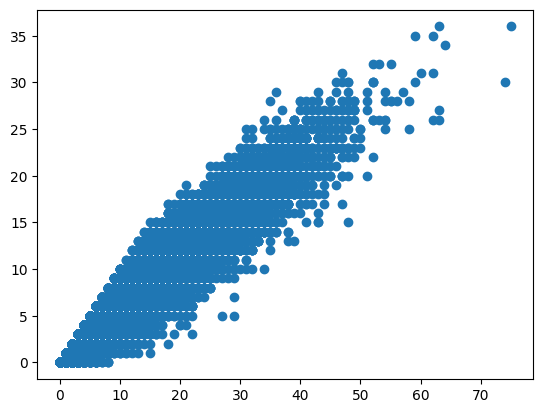

In [5]:
# Make a scatter plot of nt_mutation_count vs aa_mutation_count

import matplotlib.pyplot as plt
plt.scatter(pcp_df["nt_mutation_count"], pcp_df["aa_mutation_count"])

<Axes: >

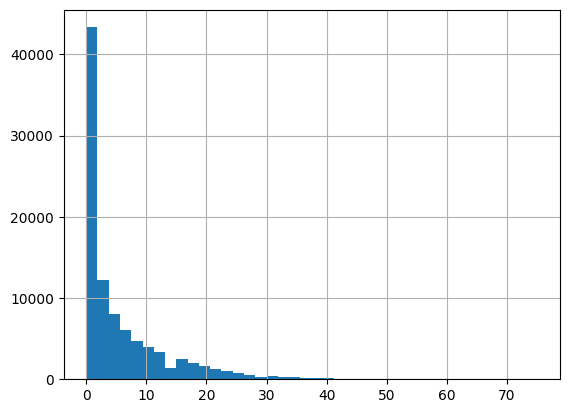

In [6]:
pcp_df["nt_mutation_count"].hist(bins=40)

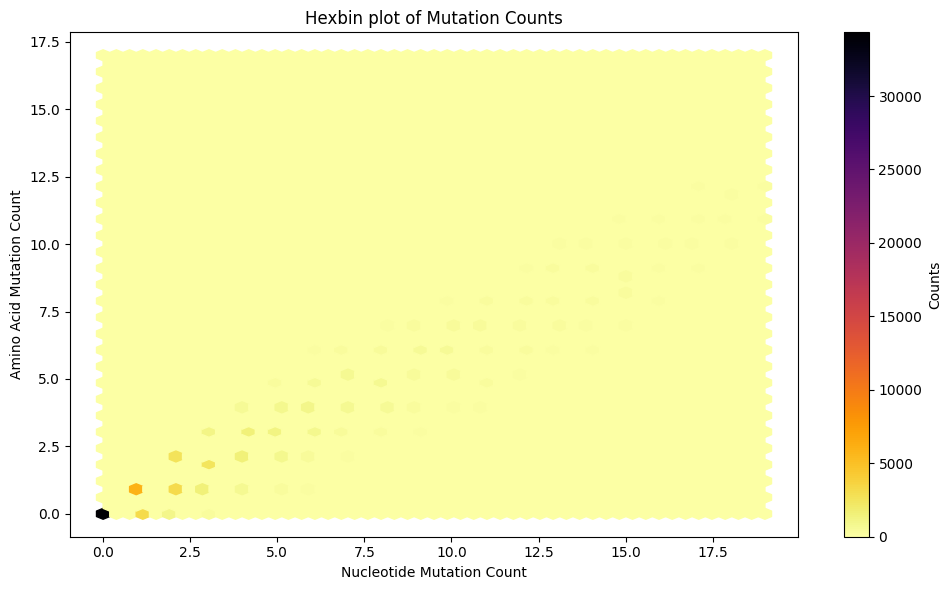

In [7]:
import matplotlib.pyplot as plt

pcp_df_filtered = pcp_df[pcp_df["nt_mutation_count"] < 20]

# Generate the hexbin plot
plt.figure(figsize=(10, 6))
hb = plt.hexbin(pcp_df_filtered["nt_mutation_count"], pcp_df_filtered["aa_mutation_count"], gridsize=50, cmap='inferno_r')

# Add a colorbar to the plot
cb = plt.colorbar(hb)
cb.set_label('Counts')

# Set axis labels and title
plt.xlabel('Nucleotide Mutation Count')
plt.ylabel('Amino Acid Mutation Count')
plt.title('Hexbin plot of Mutation Counts')

plt.tight_layout()
plt.show()


In [8]:
high_mut_df = pcp_df[pcp_df["nt_mutation_count"] > 30]

len(high_mut_df)

1307

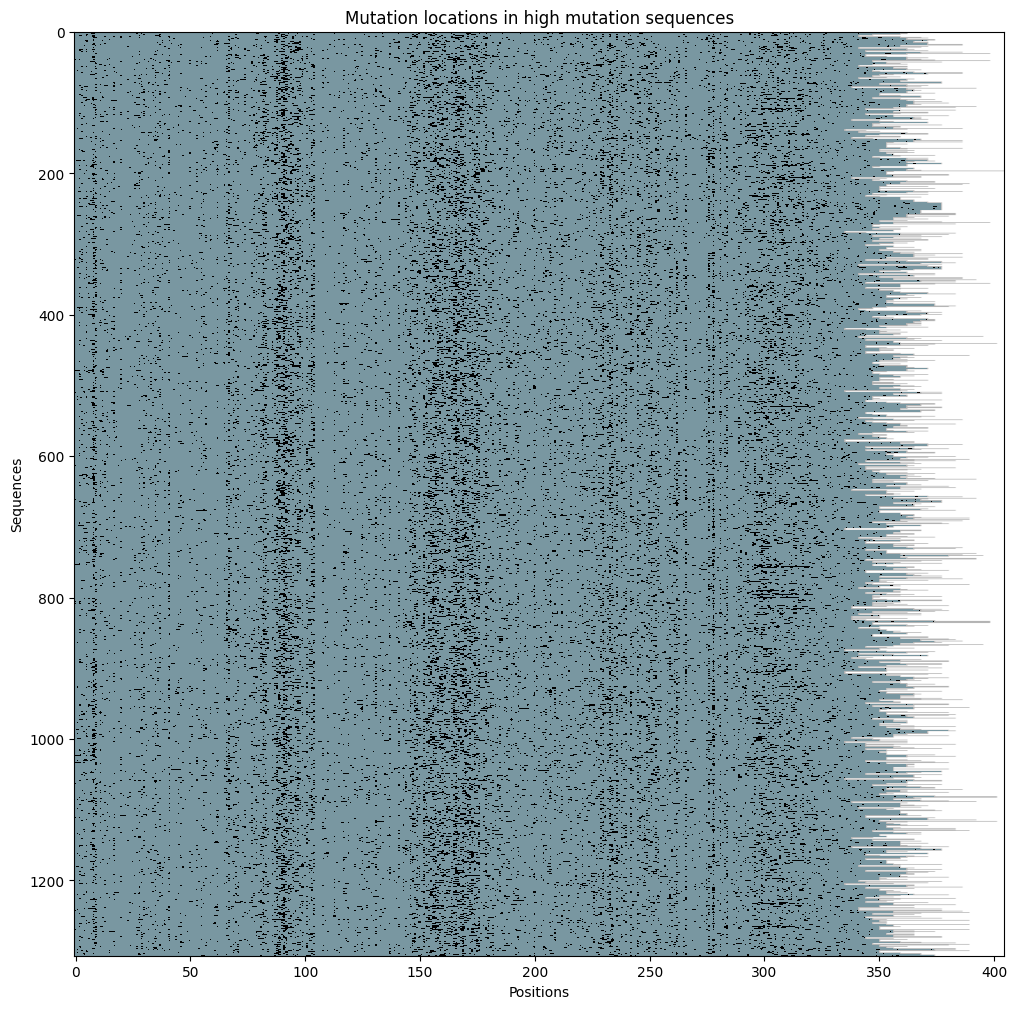

In [9]:
# Find the maximum sequence length
max_len = high_mut_df['nt_mutations'].apply(len).max()

# Initialize a 2D NumPy array with NaNs
arr = np.full((len(high_mut_df), max_len), np.nan)

# Fill in the values
for i, row in enumerate(high_mut_df['nt_mutations']):
    arr[i, :len(row)] = row

plt.figure(figsize=(12, 12))

# Define the colormap: white for NaN, light gray for False, and black for True
cmap = plt.cm.colors.ListedColormap(['lightblue', 'black'])
plt.imshow(arr, cmap=cmap, aspect='auto')

# Use white color for NaNs
plt.imshow(np.isnan(arr), cmap='gray', alpha=0.3, aspect='auto')

plt.title("Mutation locations in high mutation sequences")
plt.xlabel("Positions")
plt.ylabel("Sequences")
plt.show()


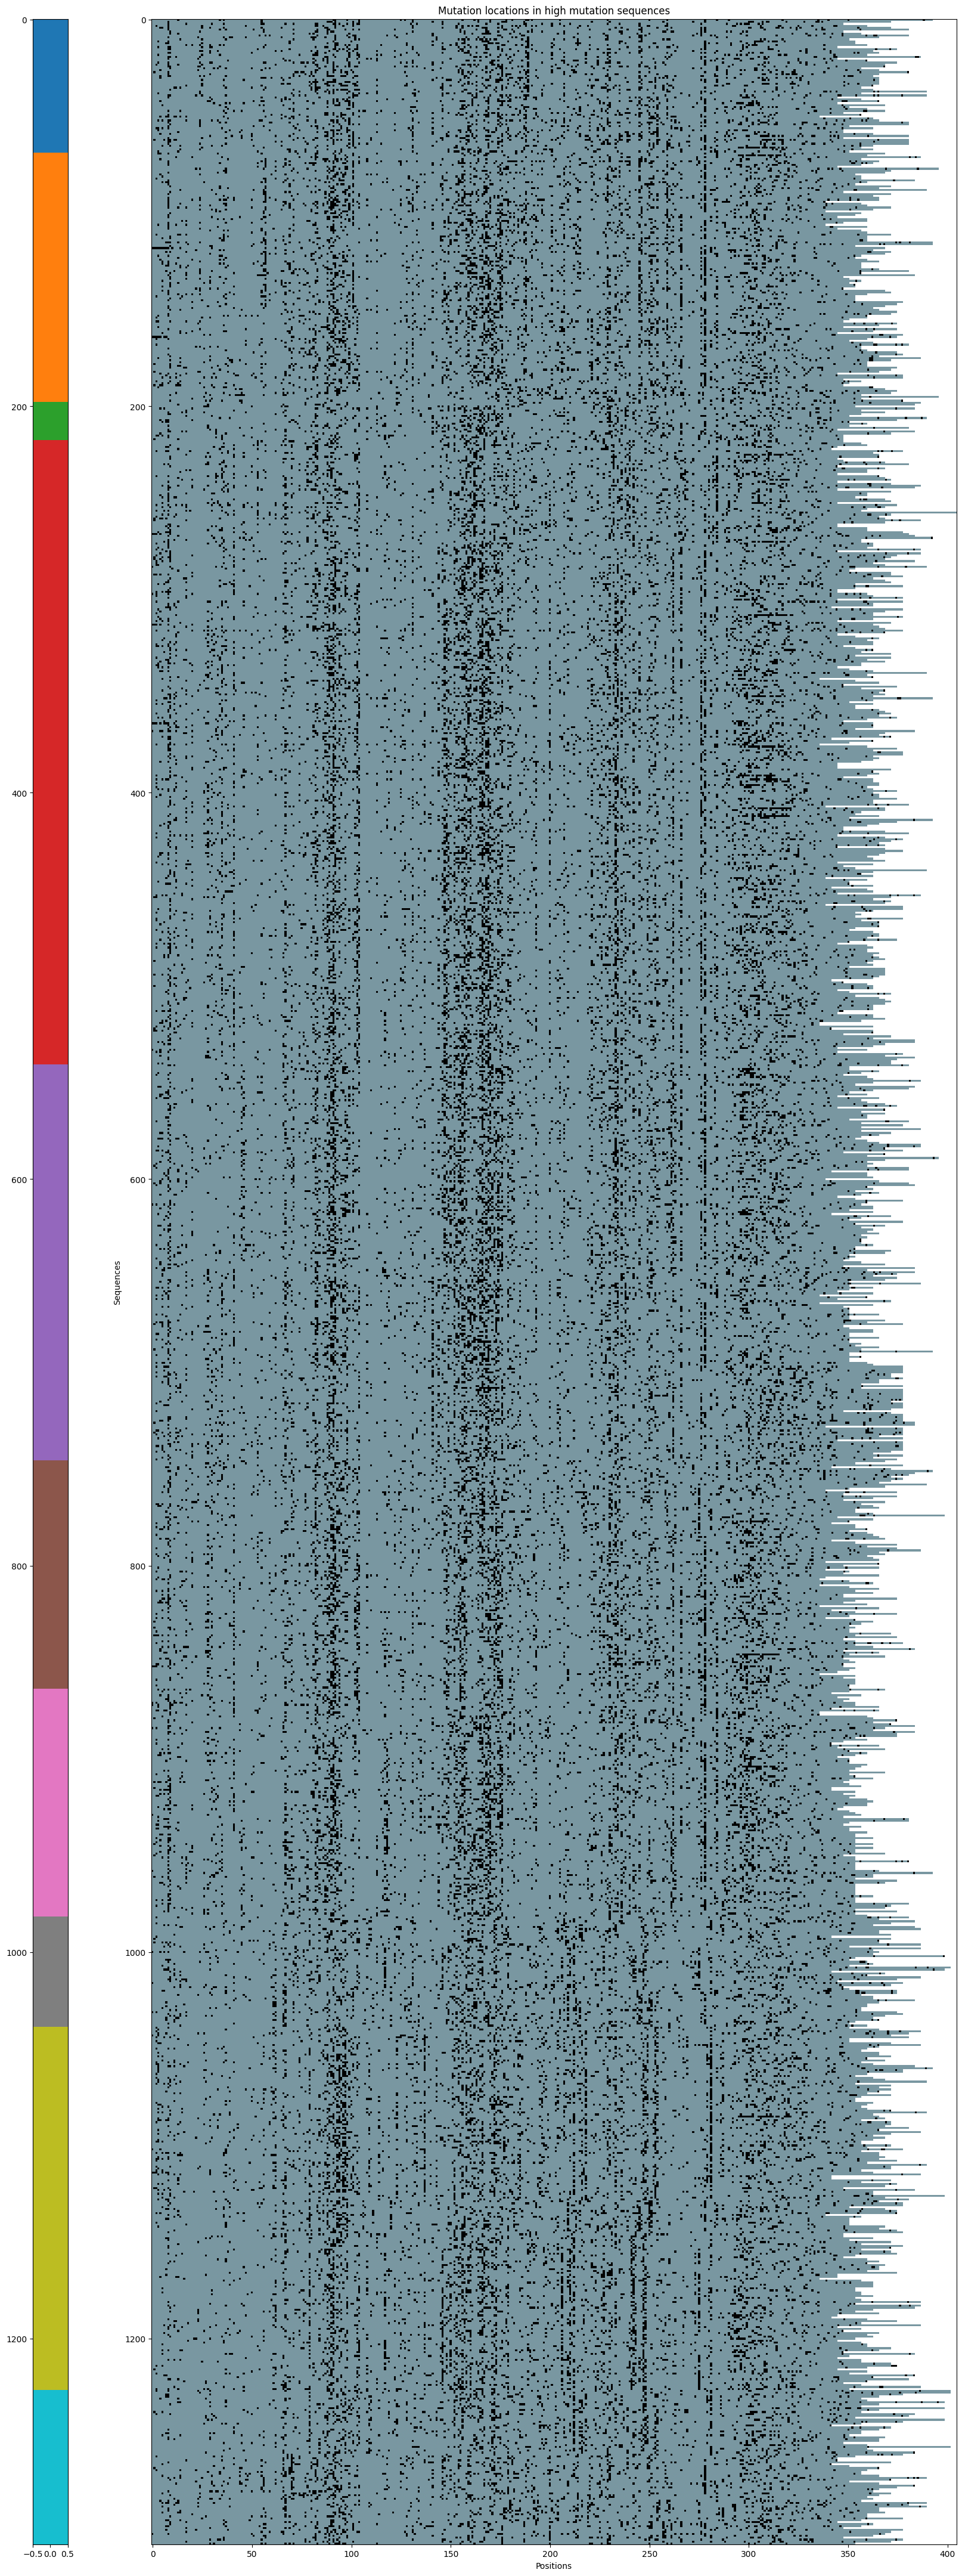

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Sort by v_gene column
high_mut_df = high_mut_df.sort_values(by='v_gene')

# Find the maximum sequence length
max_len = high_mut_df['nt_mutations'].apply(len).max()

# Initialize a 2D NumPy array with NaNs for mutations
arr = np.full((len(high_mut_df), max_len), np.nan)

# Initialize a 2D NumPy array for v_gene
v_gene_arr = np.zeros((len(high_mut_df), 1))

# Map unique v_gene values to integers for coloring
unique_genes = high_mut_df['v_gene'].unique()
gene_to_int = {gene: i for i, gene in enumerate(unique_genes)}
v_gene_arr[:, 0] = high_mut_df['v_gene'].map(gene_to_int)

# Fill in the values for mutations
for i, row in enumerate(high_mut_df['nt_mutations']):
    arr[i, :len(row)] = row

# Create a 12x12 figure
fig = plt.figure(figsize=(20, 55))

# Define the grid layout
gs = GridSpec(1, 2, width_ratios=[0.5, 11.5])  # 0.5 inch for the first plot, 11.5 inches for the second

# Create the subplots
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# Plot v_gene information on ax1
ax1.imshow(v_gene_arr, cmap='tab10', aspect='auto')

# Plot mutation information on ax2
cmap = plt.cm.colors.ListedColormap(['lightblue', 'black'])
ax2.imshow(arr, cmap=cmap, aspect='auto')

# Use gray color for NaNs on ax2
ax2.imshow(np.isnan(arr), cmap='gray', alpha=0.3, aspect='auto')

plt.title("Mutation locations in high mutation sequences")
ax2.set_xlabel("Positions")
ax2.set_ylabel("Sequences")
plt.show()
